<a href="https://colab.research.google.com/github/coffee-mug1910/Brainwave_Matrix_Intern/blob/main/Another_copy_of_Project_10_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,9926
1.0,38


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(9926, 31)
(38, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,9926.000000
mean,62.919501
std,184.041297
min,0.000000
25%,5.172500
50%,15.950000
75%,51.067500
max,7712.430000


In [ ]:
fraud.Amount.describe()

,Amount
count,38.000000
mean,75.730526
std,304.521215
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5921.607697,-0.235577,0.266833,0.934388,0.239735,-0.041743,0.140925,-0.057661,-0.069971,0.813003,...,0.026103,-0.055139,-0.152043,-0.033460,0.023142,0.087567,0.107554,0.003624,0.001701,62.919501
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
726,549,1.422461,-0.547422,-0.147438,-0.615979,-0.677018,-0.825597,-0.295487,-0.237954,-0.639154,...,0.122827,0.342161,-0.236404,-0.077528,0.828618,-0.034126,-0.017271,0.000946,30.00,0.0
9595,14429,1.242776,-0.127617,0.374944,-0.115291,-0.014412,0.630632,-0.641063,0.157249,1.549868,...,-0.063784,0.082094,-0.142584,-1.119054,0.260787,1.115294,-0.078205,-0.019462,15.95,0.0
7162,9385,1.277324,0.020771,0.711620,0.906633,-0.302123,0.207496,-0.439748,-0.071859,2.192339,...,-0.344945,-0.346779,-0.158621,-0.409774,0.634101,0.538742,-0.025721,-0.000933,0.01,0.0
6436,7638,0.868625,-1.025389,2.052686,0.909000,-1.884301,0.681711,-1.423085,0.369039,3.083057,...,0.010320,0.509785,-0.167700,0.615963,0.166079,1.172392,-0.031733,0.025152,119.43,0.0
1123,871,1.184127,0.626778,0.714077,2.485282,-0.157646,-0.524432,0.161986,-0.145609,-0.806322,...,-0.065100,-0.212762,0.014422,0.385381,0.438366,-0.076374,-0.005936,0.026247,6.56,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.0,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.0,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.0,1.0
9509,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.0,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,38


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5589.321138,-0.408134,0.226475,1.019406,0.304997,-0.042991,0.190735,-0.017295,-0.000660,0.831263,...,0.021919,-0.079067,-0.139457,-0.007250,0.006546,0.086700,0.125658,-0.008876,-0.022150,68.536484
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,...,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

       Time        V1        V2         V3         V4        V5        V6  \
726     549  1.422461 -0.547422  -0.147438  -0.615979 -0.677018 -0.825597   
9595  14429  1.242776 -0.127617   0.374944  -0.115291 -0.014412  0.630632   
7162   9385  1.277324  0.020771   0.711620   0.906633 -0.302123  0.207496   
6436   7638  0.868625 -1.025389   2.052686   0.909000 -1.884301  0.681711   
1123    871  1.184127  0.626778   0.714077   2.485282 -0.157646 -0.524432   
...     ...       ...       ...        ...        ...       ...       ...   
9035  12597 -2.589617  7.016714 -13.705407  10.343228 -2.954461 -3.055116   
9179  13126 -2.880042  5.225442 -11.063330   6.689951 -5.759924 -2.244031   
9252  13323 -5.454362  8.287421 -12.752811   8.594342 -3.106002 -3.179949   
9487  14073 -4.153014  8.204797 -15.031714  10.330100 -3.994426 -3.250013   
9509  14152 -4.710529  8.636214 -15.496222  10.313349 -4.351341 -3.322689   

             V7        V8        V9  ...       V20       V21       V22  \
7

In [ ]:
print(Y)

726     0.0
9595    0.0
7162    0.0
6436    0.0
1123    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 530, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(530, 30) (424, 30) (106, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9929245283018868


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.75      0.82        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56643     8]
 [   24    71]]
AUC-ROC Score: 0.9645725582955287


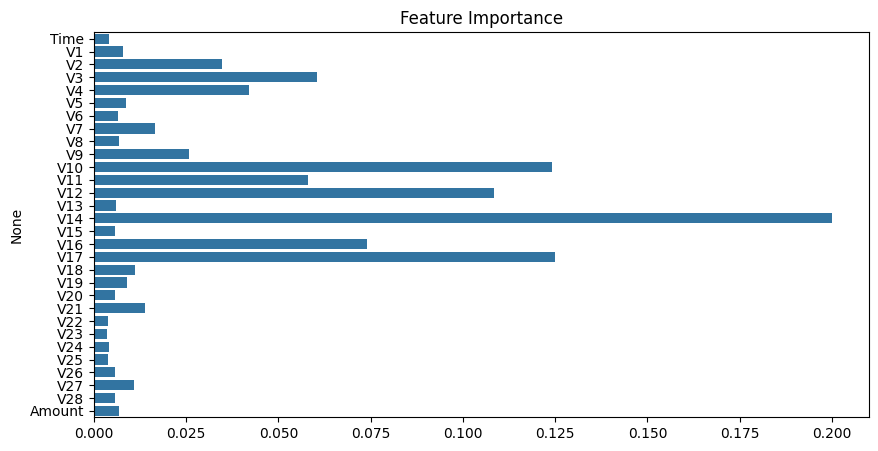

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pickle
from flask import Flask, request, jsonify

# Load dataset
file_path = "/content/creditcard.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Data Preprocessing
df.drop_duplicates(inplace=True)

# Splitting data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (Scaling after splitting to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling Class Imbalance
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

# Save Model & Scaler
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Simple API using Flask
# Change _name_ to __name__
app = Flask(__name__)

# Load Model and Scaler for API
with open('fraud_detection_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Convert input data to NumPy array
    input_data = np.array(data['features']).reshape(1, -1)

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)

    return jsonify({'fraud': bool(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)